# Diesel Solar Hybrid for Mageragere Tower

# ACCESS SOLAR RESSOURCES 

#### DATA COLLECTED

Daily consumption of the tower = 14 kwh 

Daily fuel consumed = 60 litres 

batteries = 6 strings with 2 batteries on string 

latitude = -2.0121

##### project assumptions 




albedo of 0.2 and that GHI is made up of 90% direct
and 10% diffuse radiation.

 # libraries 

In [1]:
import pandas as pd
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

##### days of the year


In [2]:
dates =pd.date_range(start='1/1/2020', periods=366)

days=[]
for i in dates:
    day= i.strftime('%j')
    days.append(day)
    
df1 = pd.DataFrame(dates,days) 
df2 = df1.reset_index().rename(columns={'index':'days',0:'dates'})
df3 =df2[['dates','days']]
df3['days'] = df3['days'].astype('int')
a = df3['days'].values
declinations= []
for i in a:
    declination = 23.45 * math.sin(math.radians((360*(i-80))/365))
    declinations.append(declination)
    
df4 = pd.DataFrame(declinations)
df5 = df3.join(df4)
df6=df5.rename(columns={0:'declination(∂)'})

df6

,dates,days,declination(∂)
0,2020-01-01,1,-22.930544
1,2020-01-02,2,-22.842656
2,2020-01-03,3,-22.747999
3,2020-01-04,4,-22.646602
4,2020-01-05,5,-22.538493
...,...,...,...
361,2020-12-27,362,-23.213917
362,2020-12-28,363,-23.153344
363,2020-12-29,364,-23.085911
364,2020-12-30,365,-23.011637


# hourly day 

In [3]:
hours = np.arange(1,25)
hours

hour_angles = []
for i in hours:
    hour_angle = 15 * (i-12)
    hour_angles.append(hour_angle)
hour_angles
df0 = pd.DataFrame(hours,hour_angles)
df01= df0.reset_index()
df02 = df01.rename(columns={'index':'Hour angle h',0:'Hours of the day'})
b=df02['Hour angle h'].values
df02

,Hour angle h,Hours of the day
0,-165,1
1,-150,2
2,-135,3
3,-120,4
4,-105,5
5,-90,6
6,-75,7
7,-60,8
8,-45,9
9,-30,10


In [4]:
Get = []
l =  -2.0121
solar_constant = 1367
for j in b:
    for i in declinations:
        get= round(solar_constant * ((math.sin(math.radians(l))*math.sin(math.radians(i))) + (math.cos(math.radians(l))*math.cos(math.radians(i))*math.cos(math.radians(j)))))
        
        Get.append(get)
cr = np.reshape(Get, (24,366)).T
co = pd.DataFrame(cr)
co[co < 0] =0
co.index = df6.dates
co.columns = np.arange(1,25,1)
ca = co.resample('M').mean()
ca.index = ['January','February','March','April','May','June','July','August','September','October','November','December']
# len(Get)
ca


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
January,0.0,0.0,0.0,0.0,0.0,16.935484,347.580645,655.806452,920.387097,1123.516129,...,920.387097,655.806452,347.580645,16.935484,0.0,0.0,0.0,0.0,0.0,0.0
February,0.0,0.0,0.0,0.0,0.0,10.655172,355.068966,675.896552,951.448276,1162.862069,...,951.448276,675.896552,355.068966,10.655172,0.0,0.0,0.0,0.0,0.0,0.0
March,0.0,0.0,0.0,0.0,0.0,2.032258,354.129032,682.806452,965.032258,1181.741935,...,965.032258,682.806452,354.129032,2.032258,0.0,0.0,0.0,0.0,0.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.000000,338.966667,662.833333,940.866667,1154.166667,...,940.866667,662.833333,338.966667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
May,0.0,0.0,0.0,0.0,0.0,0.000000,317.774194,628.612903,895.548387,1100.451613,...,895.548387,628.612903,317.774194,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.000000,306.233333,609.333333,869.366667,1069.000000,...,869.366667,609.333333,306.233333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.000000,313.483871,621.419355,885.903226,1088.838710,...,885.903226,621.419355,313.483871,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
August,0.0,0.0,0.0,0.0,0.0,0.000000,334.064516,655.161290,930.806452,1142.419355,...,930.806452,655.161290,334.064516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
September,0.0,0.0,0.0,0.0,0.0,0.866667,351.866667,680.766667,962.966667,1179.666667,...,962.966667,680.766667,351.866667,0.866667,0.0,0.0,0.0,0.0,0.0,0.0
October,0.0,0.0,0.0,0.0,0.0,8.741935,355.903226,679.258065,957.032258,1170.032258,...,957.032258,679.258065,355.903226,8.741935,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
np.arange(1,25,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

# clear sky 

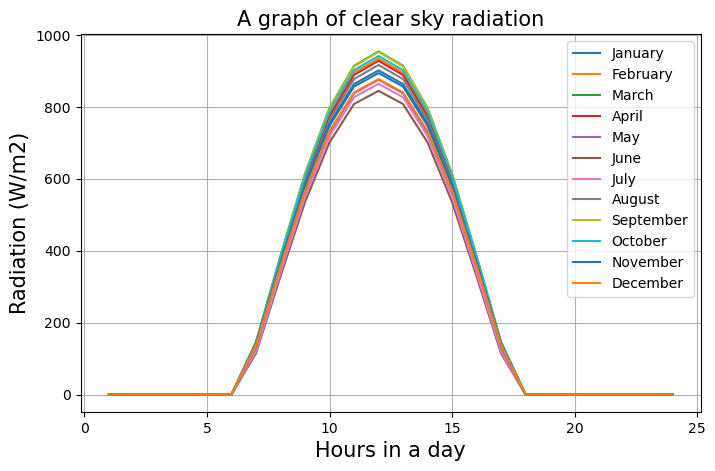

,dates,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.027265,138.700597,358.562187,567.182773,...,567.182773,358.562187,138.700597,0.027265,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.026828,138.736089,358.637597,567.908785,...,567.908785,358.637597,138.736089,0.026828,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.026363,139.177484,359.271959,568.017390,...,568.017390,359.271959,139.177484,0.026363,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.024507,139.218011,359.358128,568.758092,...,568.758092,359.358128,139.218011,0.024507,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.024014,139.260902,359.449432,569.505987,...,569.505987,359.449432,139.260902,0.024014,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,0.0,0.0,0.0,0.0,0.0,0.028701,138.584686,357.763433,566.228599,...,566.228599,357.763433,138.584686,0.028701,0.0,0.0,0.0,0.0,0.0,0.0
362,2020-12-28,0.0,0.0,0.0,0.0,0.0,0.028391,138.609652,357.816233,566.299477,...,566.299477,357.816233,138.609652,0.028391,0.0,0.0,0.0,0.0,0.0,0.0
363,2020-12-29,0.0,0.0,0.0,0.0,0.0,0.028047,138.637325,357.874795,566.378101,...,566.378101,357.874795,138.637325,0.028047,0.0,0.0,0.0,0.0,0.0,0.0
364,2020-12-30,0.0,0.0,0.0,0.0,0.0,0.027672,138.667657,357.939032,567.088904,...,567.088904,357.939032,138.667657,0.027672,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
b
V1 = []
AM = []
l = -2.0121 
solar_constant = 1367
for j in b:
    for i in declinations:
        v=round(solar_constant * ((math.sin(math.radians(l))*math.sin(math.radians(i))) + (math.cos(math.radians(l))*math.cos(math.radians(i))*math.cos(math.radians(j)))))
        V1.append(v)
        f= math.degrees(math.asin(((math.sin(math.radians(l))*math.sin(math.radians(i))) + (math.cos(math.radians(l))*math.cos(math.radians(i))*math.cos(math.radians(j))))))

        am = 1/(math.cos(math.radians(90-f)))
        AM.append(am)

V2 =  [0 if i < 0 else i for i in V1]
cle = []

for k,n in zip(AM,V2):
    p= (k**0.678).real
    clear= (n) * ((0.7)**(p))
    cle.append(clear)
cler = np.reshape(cle, (24, 366)).T
G = pd.DataFrame(cler)

G.index = df6.dates
G.columns = np.arange(1,25,1)
Global_radiation = G.resample('M').mean()
Ga = Global_radiation.reset_index()
Ga
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(12):
    plt.plot(df02.iloc[:,1],Ga.iloc[i,1:],label=labels[i])
plt.legend()
plt.xlabel('Hours in a day',fontsize=15)
plt.ylabel('Radiation (W/m2)',fontsize=15)
plt.title('A graph of clear sky radiation',fontsize=15)
plt.grid()
plt.show()
G1 = G.reset_index()
G1[12]
G1

# solar radiation for different tilt angles (0 - 45 and latitude)  

In [84]:
def glob_radiation(tilt_angle):
    GB = 0.9 * G1.iloc[:,1:]
    GD =0.1 * G1.iloc[:,1:] 
    GR = 0.2 * G1.iloc[:,1:] 
    # tilt_angle =  0
    l =  -2.0121
    ZS = 180
    GGD = (0.5+(0.5 * math.cos(math.radians(tilt_angle)))) * GD
    GGR = (0.5-(0.5 * math.cos(math.radians(tilt_angle)))) * GR


    Angle=[]
    for i in b:
        for j in declinations: 
            cosine_theta =( (math.sin(math.radians(l))) * (math.sin(math.radians(j))) * (math.cos(math.radians(tilt_angle)))
                    ) +((math.cos(math.radians(l))) *(math.sin(math.radians(j))) * (math.cos(math.radians(ZS))) * (math.sin(math.radians(tilt_angle)))) + ((math.cos(math.radians(l))) * (math.cos(math.radians(j))) * (math.cos(math.radians(i))) * (math.cos(math.radians(tilt_angle)))
                    ) - ((math.sin(math.radians(l))) * (math.cos(math.radians(j))) * (math.cos(math.radians(i))) * (math.sin(math.radians(tilt_angle))) * (math.cos(math.radians(ZS)))) - ((math.cos(math.radians(j))) * (math.sin(math.radians(i))) * (math.sin(math.radians(tilt_angle))) * (math.sin(math.radians(ZS))))
            apha= math.degrees(math.asin(((math.sin(math.radians(l))*math.sin(math.radians(i))) + (math.cos(math.radians(l))*math.cos(math.radians(i))*math.cos(math.radians(j))))))
            x = (cosine_theta)/(math.cos(math.radians(90-apha)))
            Angle.append(x)
    Angle
    ang = np.reshape(Angle, (24, 366)).T
    Ang = pd.DataFrame(ang)
    Ang.columns = np.arange(1,25,1)
    GGB = GB * Ang
    # GGB[GGB < 0] = 0 

    GG = GGD + GGR + GGB
    GG[GG < 0] = 0

    GG['dates'] = dates
    gg1 =GG.set_index('dates')
    GG1 = gg1.resample('M').mean()
    Global_rad =GG1.iloc[:,11]
    return (Global_rad)
    

In [111]:
A =[]
Tilt = [i for i in np.arange(0,50,5)]
Tilt.append(-2.0121)
for i in Tilt:
    a=glob_radiation(i)
    A.append(a.values)
glob = pd.DataFrame(A)
glob
glob[12] = glob[list(glob)].sum(axis=1)
glob = glob.T
glob.columns= ['H(0)','H(5)','H(10)','H(15)','H(20)','H(25)','H(30)','H(35)','H(40)','H(45)','H(Latitude)']
glob.index =  ['January','February','March','April','May','June','July','August','September','October','November','December','TOTAL']
glob = glob * 5 
glob

,H(0),H(5),H(10),H(15),H(20),H(25),H(30),H(35),H(40),H(45),H(Latitude)
January,4524.192330,4629.499739,4704.677758,4749.154237,4762.590683,4744.884836,4696.171449,4616.821260,4507.438171,4368.854654,4473.486078
February,4706.103661,4761.386148,4785.765676,4779.056703,4741.310288,4672.813705,4574.088253,4445.885292,4289.180525,4105.166570,4675.223854
March,4776.845038,4758.715740,4709.818122,4630.524324,4521.437821,4383.388827,4217.427977,4024.818334,3807.025774,3565.707830,4775.419278
April,4615.136824,4521.917937,4399.583269,4249.063861,4071.505256,3868.258783,3640.871270,3391.073272,3120.765905,2832.006369,4644.266118
May,4329.659566,4183.685372,4010.868695,3812.524773,3590.163124,3345.476054,3080.325779,2796.730253,2496.847810,2182.960735,4380.569919
June,4166.838360,4000.144082,3807.828281,3591.354595,3352.370519,3092.694868,2814.303929,2519.316426,2209.977392,1888.641083,4226.396073
July,4269.537026,4115.407205,3934.889817,3729.358711,3500.378101,3249.690668,2979.204294,2690.977546,2387.204001,2070.195561,4323.843817
August,4551.557541,4443.722659,4307.301424,4143.332082,3953.062540,3737.940864,3499.604259,3239.866610,2960.704680,2664.243057,4586.692978
September,4761.593145,4725.320207,4658.524083,4561.713130,4435.624138,4281.216722,4099.666014,3892.353725,3660.857627,3406.939544,4767.506756
October,4736.963046,4777.542956,4787.138849,4765.677694,4713.322822,4630.472687,4517.757827,4376.036072,4206.386008,4010.098776,4711.951650


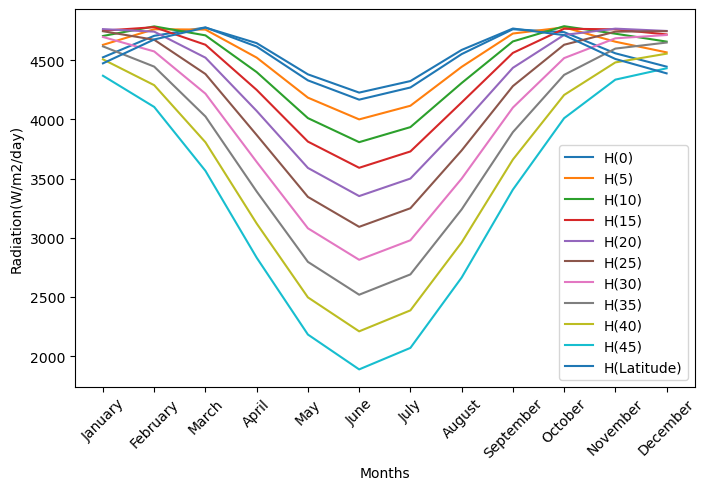

In [116]:
globa = glob.iloc[:-1,:]
# globa
Labels = ['H(0)','H(5)','H(10)','H(15)','H(20)','H(25)','H(30)','H(35)','H(40)','H(45)','H(Latitude)']
for i in range(11):
    plt.plot(globa.index,globa.iloc[:,i],label=Labels[i])
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Months')
plt.ylabel('Radiation(W/m2/day)')
plt.savefig('r.png')
plt.show()


**The best tilt is the latitude and the worst case month is june which has 4226.39 Wh/m2/day** 

june with minimum power as worst case scenario 

# PV array sizing

###### AC LOAD

In [118]:
AC_load = 14000 

**Assuming inverter efficiency of 95%**

###### total DC load 


In [119]:
inverter_eff = 0.95
DC_load = AC_load/inverter_eff
print('the total daily DC consumption is {} Wh'.format(DC_load))

the total daily DC consumption is 14736.842105263158 Wh


### Battery sizing  

#### battery capacity 

In [121]:
Battery_capacity = (3 * DC_load) / (0.50 * 48)
print('the battery capacity is {} Ah'.format(Battery_capacity))

the battery capacity is 1842.1052631578948 Ah


###### number of batteries in parallel  

In [122]:
import math
N_batteries_parallel = math.ceil(Battery_capacity/1500)
print('Number of batteries in parallel are {} batteries'.format(N_batteries_parallel))

Number of batteries in parallel are 2 batteries


#### Number of batteries in series 

In [125]:
n_batteries_series = 48 / 2 
print('Number of batteries in parallel are {} batteries'.format(math.ceil(n_batteries_series)))

Number of batteries in parallel are 24 batteries


##### Total number of batteries  

In [126]:
Number_of_batteries = 24 * 2
print('Total Number of batteries are {} batteries'.format(Number_of_batteries))

Total Number of batteries are 48 batteries


## array sizing  

In [127]:
Qd = DC_load/48

In [128]:
kavail = Battery_capacity * 0.50 

In [137]:
Parray = ((1.1 * 48)/(0.90 * 4.22 * 0.80)) * (Qd +(kavail/3))

In [138]:
print('P-array is {} W'.format(Parray))

P-array is 10670.435963526512 W


##### Number of modules  

In [139]:
Number_of_modules = Parray/200

In [140]:
print('Number of modules required are {} modules'.format(math.ceil(Number_of_modules)))

Number of modules required are 54 modules
